In [1]:
name = "Write your name here"
date_returned = "Write the date returned here"

# Lab 9 Position estimation
Hardware 2 course - Mathematics and Physics<br>
Information and Communication Technology<br>
Metropolia University of Applied Sciences

## Setup

Read necessary libraries and functions.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid, cumulative_trapezoid
from pathlib import Path 
import pandas as pd

## Problem

Following code shows how you can estimate the position of the elevator by numerically integrating twice the accelerometer data to find the instantaneous velocity and position.

**Your task is to use your own measurement data and improve the code in order to get proper velocity and position estimates for the elevator.**

1. Install [Physics Toolbox Sensor Suite](https://play.google.com/store/apps/details?id=com.chrystianvieyra.physicstoolboxsuite&hl=en&gl=US) mobile application.
1. Step into the elevator at the campus to collect the accelerometer (g-force) data. 
1. Drive with the elevator between the floors. 
1. Send the collected data to yourself by email. 
1. Estimate the position of the drive numerically using Python.
1. Draw the plots of the acceleration, velocity, and position.
1. Improve the code to remove the drift from the integrated data.

## Read and parse data

In [3]:
# Use here your own file
filename = '2024-04-2415.47.46.csv'

# Troubles with data? Use this code
# txt = Path(filename).read_text().replace('−', '-').replace(',', '.')
# Path('data.csv').write_text(txt)
# df = pd.read_csv('data.csv', sep = ';', decimal = '.')

# Datafile is ok, use this code
df = pd.read_csv(filename, sep = ',', decimal = '.')

# Print the first 5 rows
df.head(5)

,time,gFx,gFy,gFz,TgF
0,0.001324,"−0,0081",0.9801,"−0,0001",0.980
1,0.001627,"−0,0098",0.9789,"−0,0109",0.979
2,0.001835,"−0,0090",0.9794,"−0,0214",0.980
3,0.002040,"−0,0090",0.9789,"−0,0253",0.979
4,0.002178,"−0,0093",0.9808,"−0,0231",0.981


## Convert to numpy arrays and plot the acceleration in g-units

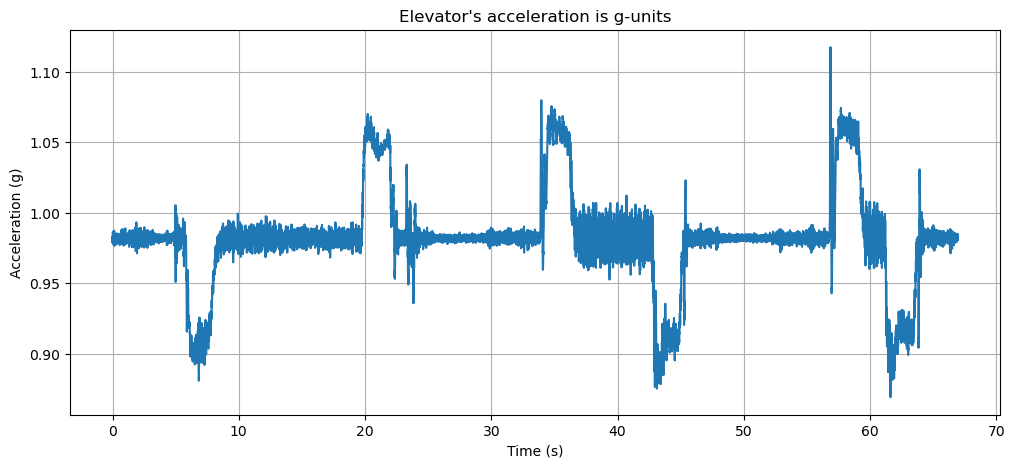

In [4]:
# Convert to numpy arrays
t = df['time'].values

# Phone was against wall
g = df['gFy'].values 
# Phone was on floor
# g = df['gFz'].values 
    
# If you need, cut your data, for example, select data from 20 sec to 70 sec
# i = (t >= 0) & (t < 70)
# t = t[i] 
# g = g[i]

# Plot accelerometer data (in g-units)
plt.figure(figsize=(12, 5))
plt.plot(t, g)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.title("Elevator's acceleration is g-units")
plt.show()

## Convert acceleration data to SI-units

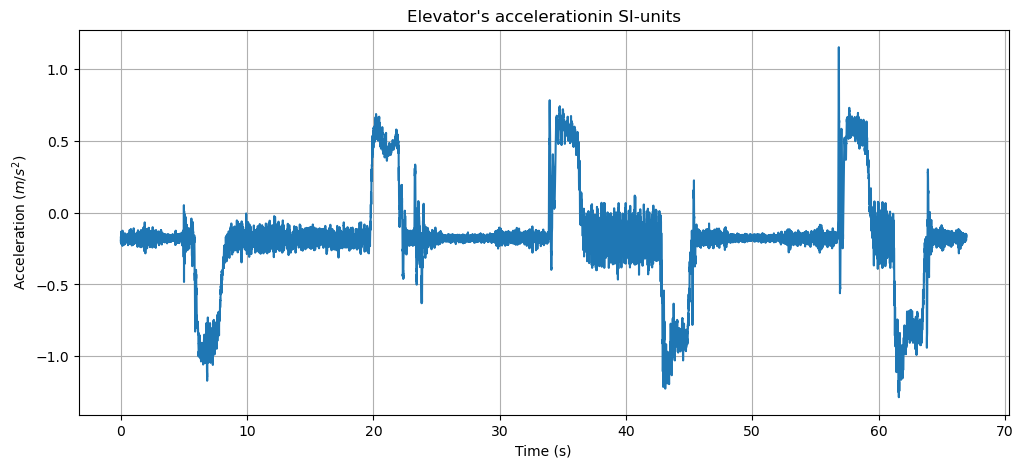

In [5]:
# Remove constant acceleration due to the gravity and multiply by 9.81 to get acceleration in SI units
a = 9.81*(g - 1)
# a = -9.81*(g + 1) # If reversed coordinate system

# Plot accelerometer data in SI-units (m/s^2)
plt.figure(figsize=(12, 5))
plt.plot(t, a)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Acceleration ($m/s^2$)')
plt.title("Elevator's accelerationin SI-units")
plt.show()

## Integrate velocity

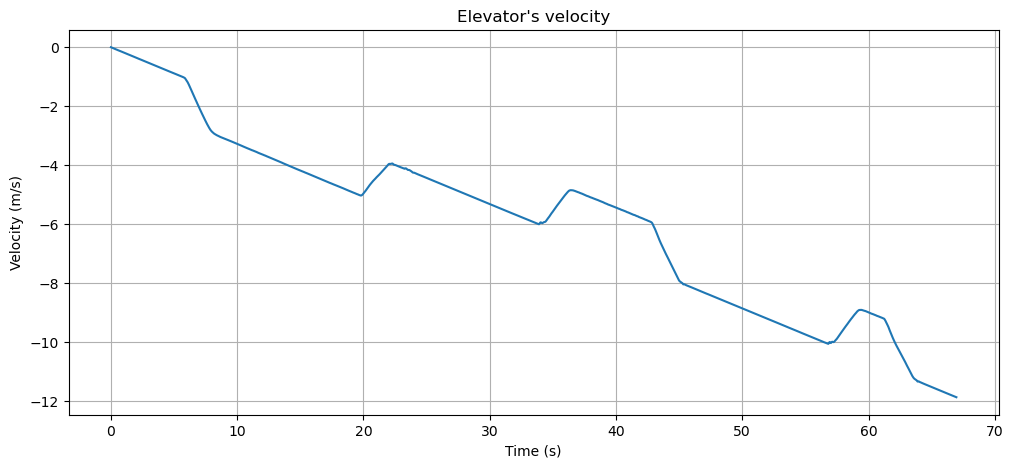

In [6]:
# Use cumulative trapezoid to calculate the velocity
v = cumulative_trapezoid(a, t, initial = 0)

# WRITE HERE YOUR OWN CODE TO REMOVE THE TREND
# Notice how the velocity is drifted if no correction is done (See graph below)

# Plot values
plt.figure(figsize  =(12, 5))
plt.plot(t, v)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title("Elevator's velocity")
plt.show()

## Integrate position

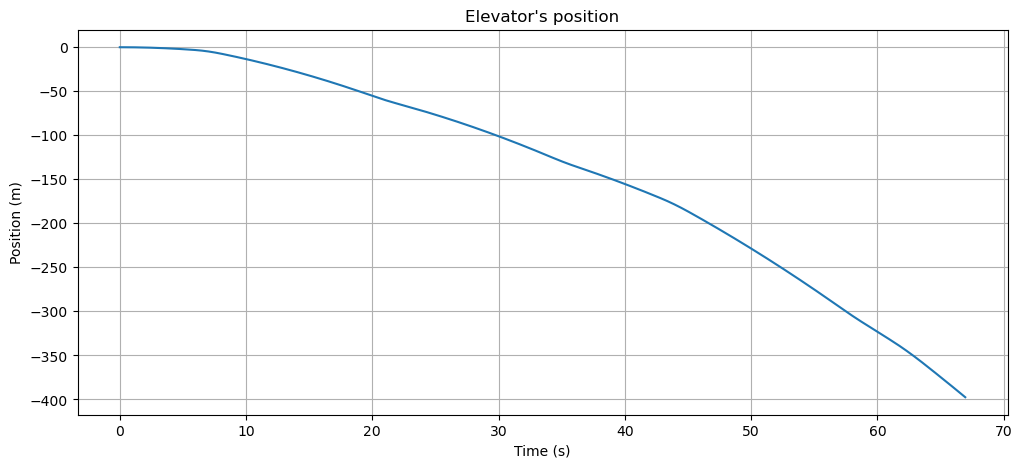

In [7]:
# Use cumulative trapezoid to calculate the position
p = cumulative_trapezoid(v, t, initial = 0)

## WRITE HERE YOUR OWN CODE TO REMOVE THE TREND
# Please, remember correct the velocity first, then correct the position
# In this example the position shows 400 meters under ground (not realistic!)


# Plot values
plt.figure(figsize=(12, 5))
plt.plot(t, p)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title("Elevator's position")
plt.show()